
#  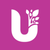   **Universidad de la ciudad de Buenos Aires**

# Programación funcional en Python
Adicional de las funciones más comunes que se usan en ciencia de datos, veamos 3 ejemplos/temas de la programación funcional.

## 1. Funciones en Python
Creación de una función en Python

In [ ]:
def add_one(number):
  return number + 1
add_one(2)

## 2. First-Class Objects
Aunque en programación funcional, se enfoca en funciones, no te confundas con su nombre ... ¿qué imprime este código?¿cómo lo definirias?

In [8]:
def lineal(name):
    return f"Soy una función que realiza una regresión {name}"

def metricas(name):
    return f"Yo ejecuto metricas para validar al modelo {name}"

def modelosSupervisado(modelo_eleccion):
    return modelo_eleccion("Lineal")

print(modelosSupervisado(lineal))
print(modelosSupervisado(metricas))

Soy una función que realiza una regresión Lineal
Yo ejecuto metricas al modelo Lineal


## 3. Inner Functions
Podemos definir una función dentro de otra ...

In [11]:
def modelosSupervisado(modelo_eleccion):
  print("Se ejecutara un modelo de regresión lineal y su evaluación de forma consecutiva:")
  def lineal(modelo):
    print(f" - Soy una función que realiza una regresión {modelo}")

  def metricas(modelo):
    print(f" - Yo ejecuto metricas para validar al modelo {modelo}")

  lineal(modelo_eleccion)
  metricas(modelo_eleccion)

modelosSupervisado("Lineal")


Se ejecutara un modelo de regresión lineal y su evaluación de forma consecutiva:
Soy una función que realiza una regresión Lineal
Yo ejecuto metricas para validar al modelo Lineal


## 4. Functions as Return Values
Podemos definir que una función retorne otra función, vamos como ...

In [14]:
def modelosSupervisados(modelo):
    def regresion_lineal():
        return " - Soy una función que realiza una Regresión Lineal"

    def random_forest():
        return " - Soy una función que realiza un Random Forest"

    if modelo == 1:
        return regresion_lineal
    else:
        return random_forest

regresion_lineal = modelosSupervisados(1)
random_forest = modelosSupervisados(2)
print(regresion_lineal())
print(random_forest())

 - Soy una función que realiza una Regresión Lineal
 - Soy una función que realiza un Random Forest


¿puedo solo ejecutar esta linea regresion_lineal()? Explicar por qué.

## 5. Decoradores de Python simples

Estamos en la fase de obtención de datos, pero estamos decidienco si usar ETL o ELT y para esto queremos saber **cuánto tiempo se demora entre los procesos** y así definir cual se implementara en el proyecto final(_recuerda es un caso hipotetico y no es el criterio para definir el proceso en un proyecto real_).

Dos equipos realizaron la codificación en python para ETL y ELT, ¿cómo podemos comparar el tiempo que demora cada ejecución utilizando programación funcional ...?

In [50]:
import time
def pipeline(func):
    def contabilizar_proceso():
        inicio = time.time()
        resultado = func()
        time.sleep(1)  # simulamos que tarda un poco
        fin = time.time()
        print(f"La función {func.__name__} tardó {fin - inicio:.4f} segundos.")
    return contabilizar_proceso


def etl():
  print(" Se ejecuta el proceso de extraer, transformar y cargar los datos.")

etl = pipeline(etl)

In [51]:
etl()

 Se ejecuta el proceso de extraer, transformar y cargar los datos.
La función etl tardó 1.0127 segundos.


### Agregando un decorador sintetico
Podemos evitarnos el último paso de la asignación del decorador y su adición y definir que funciones queremos comparar, es decir cambiamos la siguiente linea:

```python
etl = pipeline(etl)
```

Adicionando antes de las funciones, el nombre de la funcion decorador como: @NombreDecorador.

Para nuestro escenario, sería

```python
@pipeline
```

In [1]:
import time
def pipeline(func):
    def contabilizar_proceso():
        inicio = time.time()
        resultado = func()
        time.sleep(1)  # simulamos que tarda un poco
        fin = time.time()
        print(f"La función {func.__name__} tardó {fin - inicio:.4f} segundos.")
    return contabilizar_proceso

@pipeline
def etl():
  print(" Se ejecuta el proceso de extraer, transformar y cargar los datos.")

@pipeline
def elt():
  print(" Se ejecuta el proceso de extraer, cargar y transformar los datos.")

In [47]:
etl()

 Se ejecuta el proceso de extraer, cargar y transformar los datos.
La función etl tardó 1.0004 segundos.


In [2]:
elt()

 Se ejecuta el proceso de extraer, cargar y transformar los datos.
La función elt tardó 1.0008 segundos.


# Información adicional

Si deseas ampliar tu conocimiento consulta: https://realpython.com/primer-on-python-decorators/